In [2]:
import pandas as pd 
df = pd.read_csv(r"D:\assignment2\solution\training_dataset.csv")
df

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Label
0,58:50.7,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,1
1,58:50.3,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,1
2,58:49.9,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,1
3,58:49.5,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,1
4,58:49.1,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536133,18:56.6,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
536134,18:56.2,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
536135,18:55.8,25,8,0,10,9,2.556642,6,6,7,3.333333,2,192,12,1,0
536136,18:55.4,25,8,0,10,9,2.556642,6,6,7,3.333333,2,192,12,1,0


In [3]:
df.Label.unique()

array([1, 0], dtype=int64)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536138 entries, 0 to 536137
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         536138 non-null  object 
 1   FQDN_count        536138 non-null  int64  
 2   subdomain_length  536138 non-null  int64  
 3   upper             536138 non-null  int64  
 4   lower             536138 non-null  int64  
 5   numeric           536138 non-null  int64  
 6   entropy           536138 non-null  float64
 7   special           536138 non-null  int64  
 8   labels            536138 non-null  int64  
 9   labels_max        536138 non-null  int64  
 10  labels_average    536138 non-null  float64
 11  longest_word      536124 non-null  object 
 12  sld               536138 non-null  object 
 13  len               536138 non-null  int64  
 14  subdomain         536138 non-null  int64  
 15  Label             536138 non-null  int64  
dtypes: float64(2), int64

In [5]:
df.drop(['timestamp' , 'longest_word' ,'sld', ] ,axis = 1 , inplace = True )
#df['longest_word'] = df['longest_word'].astype('category').cat.codes
#df['sld'] = df['sld'].astype('category').cat.codes



In [6]:
df.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Label
count,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000
mean,22.345262,6.100633,0.849604,10.412959,6.539344,2.485026,4.543355,4.806201,8.240375,4.794970,12.587228,0.757902,0.549025
std,5.968281,3.883699,4.951571,3.226364,4.482443,0.407780,2.193396,1.796751,4.408849,4.579084,4.173231,0.428354,0.497591
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,1.500000,2.000000,0.000000,0.000000
25%,19.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,11.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000,1.000000
max,36.000000,29.000000,32.000000,34.000000,12.000000,4.368167,8.000000,7.000000,32.000000,32.000000,35.000000,1.000000,1.000000


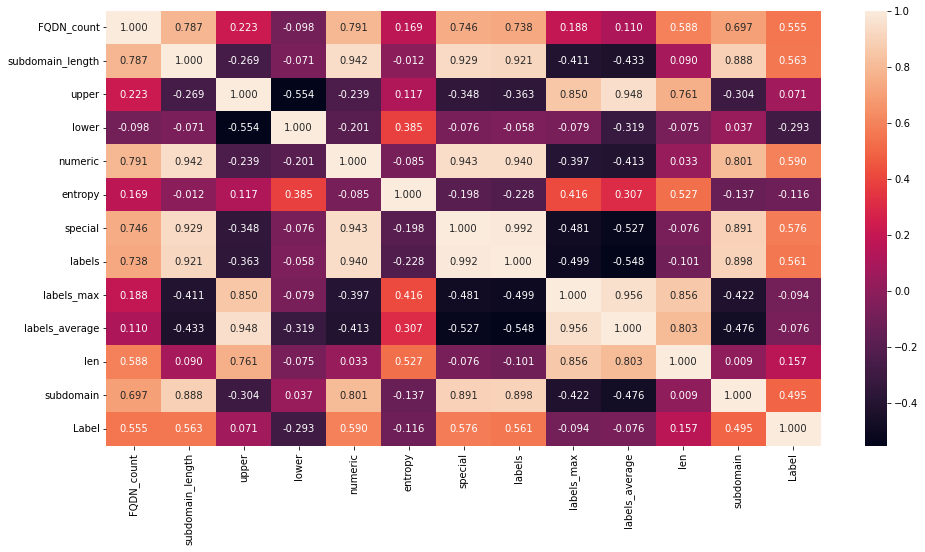

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, fmt='.3f')
plt.show()

In [8]:
y = df.iloc[ : ,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [9]:
X = df.iloc[:, :-1]
X.shape

(536138, 12)

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test ,y_train, y_test = train_test_split(X,y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                  shuffle = True,
                                                  stratify = y)

print('training data shape is :{}.'.format(X_train.shape))
print('training label shape is :{}.'.format(y_train.shape))
print('testing data shape is :{}.'.format(X_test.shape))
print('testing label shape is :{}.'.format(y_test.shape))

training data shape is :(482524, 12).
training label shape is :(482524,).
testing data shape is :(53614, 12).
testing label shape is :(53614,).


In [12]:
# ANN model 

import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential() 

model.add(Dense(12,  activation = 'relu' ,input_dim = 12))
model.add(Dense(32,  activation = 'relu' ))
model.add(Dense(16 , activation = 'relu' ))
model.add(Dense(12 , activation = 'relu' ))

model.add(Dense(1  ,activation = 'sigmoid'))

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' ,metrics = ['accuracy'])

num_epochs = 20
history = model.fit(X_train ,
                    y_train ,
                    epochs= num_epochs ,
                    batch_size = 50,
                    validation_data=(X_train ,y_train))

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: {:3.3f} and loss {:3.3f}'.format(acc ,loss))




Epoch 1/20
9651/9651 [==============================] - 17s 2ms/step - loss: 0.4133 - accuracy: 0.8191 - val_loss: 0.4105 - val_accuracy: 0.8200
Epoch 2/20
9651/9651 [==============================] - 19s 2ms/step - loss: 0.4092 - accuracy: 0.8200 - val_loss: 0.4090 - val_accuracy: 0.8201
Epoch 3/20
9651/9651 [==============================] - 15s 2ms/step - loss: 0.4090 - accuracy: 0.8200 - val_loss: 0.4089 - val_accuracy: 0.8200
Epoch 4/20
9651/9651 [==============================] - 15s 2ms/step - loss: 0.4089 - accuracy: 0.8201 - val_loss: 0.4083 - val_accuracy: 0.8203
Epoch 5/20
9651/9651 [==============================] - 14s 1ms/step - loss: 0.4088 - accuracy: 0.8201 - val_loss: 0.4084 - val_accuracy: 0.8202
Epoch 6/20
9651/9651 [==============================] - 14s 1ms/step - loss: 0.4087 - accuracy: 0.8201 - val_loss: 0.4082 - val_accuracy: 0.8203
Epoch 7/20
9651/9651 [==============================] - 14s 1ms/step - loss: 0.4087 - accuracy: 0.8201 - val_loss: 0.4085 - val_ac

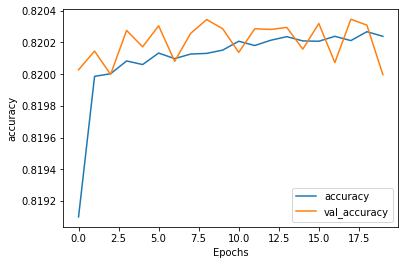

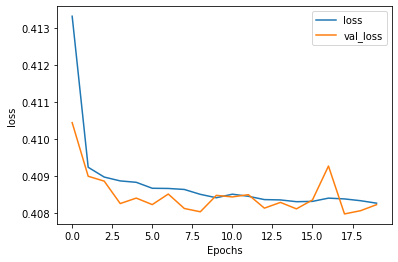

In [13]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [39]:
y_pred_ann= model.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5) * 1
n = 10
right = 0
wrong = 0
prediction = y_pred_ann.tolist()
prediction_sample = prediction[:n]
y_true = [[i] for i in y_test]
true_sample = y_true[:n]
print(f'\n accuracy : {acc}\n')
print(f' Actual values   : {true_sample}')
print(f'predicted values : {prediction_sample}\n')


 accuracy : 0.8212593793869019

 Actual values   : [[0], [1], [0], [0], [1], [1], [1], [1], [0], [0]]
predicted values : [[0], [1], [1], [0], [1], [1], [1], [1], [0], [0]]



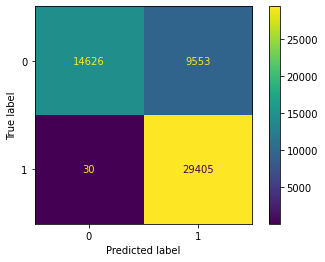

In [41]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
cm = confusion_matrix(y_true ,prediction)
disp = ConfusionMatrixDisplay(cm , display_labels=None)
disp.plot()
plt.show()

In [60]:
tf.keras.models.save_model(
    model, "model",save_format='h5')

In [63]:
loaded_model = tf.keras.models.load_model('model')
pr = loaded_model.predict(X_test)
pr = [ i[0]  for i in list((pr >0.5) * 1)]
pr

[0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,


In [100]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

rnd_clf = RandomForestClassifier(n_estimators= 500 ,
                                 criterion = "gini"
                                )

rnd_clf.fit(X_train ,y_train)
pred_rf = rnd_clf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)

print("accuracy: ",acc_rf)
print("Classification report:\n", classification_report(y_test, pred_rf))
print("Confusion matrix: [ [TN FP] [FN TP] ]\n", confusion_matrix(y_test, pred_rf))



accuracy:  0.8219121871153057
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.61      0.75     24179
           1       0.76      1.00      0.86     29435

    accuracy                           0.82     53614
   macro avg       0.88      0.80      0.81     53614
weighted avg       0.87      0.82      0.81     53614

Confusion matrix: [ [TN FP] [FN TP] ]
 [[14637  9542]
 [    6 29429]]


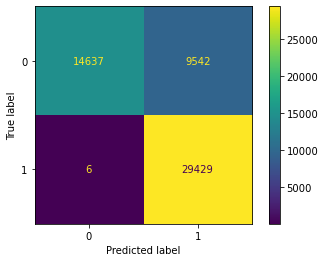

In [104]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
cm = confusion_matrix(y_test ,pred_rf)
disp = ConfusionMatrixDisplay(cm , display_labels=None)
disp.plot()
plt.show()

In [49]:
# pickle.dump(rnd_clf, open('model_rf.sav', 'wb'))
import joblib
  # save
joblib.dump(rnd_clf, "random_forest.joblib")


['random_forest.joblib']

In [107]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier(objective ='binary:hinge', colsample_bytree = 0.6, learning_rate = 0.01,
                max_depth = 25 , n_estimators = 500, use_label_encoder=False)
xg_reg.fit(X_train ,y_train)
pred_xg = xg_reg.predict(X_test)

acc_xg= accuracy_score(y_test, pred_xg)
acc_xg

0.8219121871153057

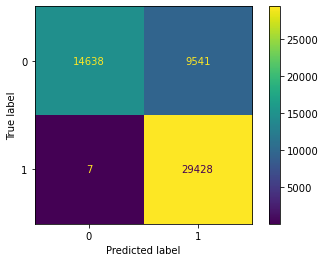

In [108]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
cm = confusion_matrix(y_test ,pred_xg)
disp = ConfusionMatrixDisplay(cm , display_labels=None)
disp.plot()
plt.show()

In [95]:
joblib.dump(xg_reg, "xgboost.joblib")

['xgboost.joblib']